# Binomial Tests and Z-Tests for Proportions


In [95]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import scipy.stats as stats

import scipy

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=np.VisibleDeprecationWarning)

mort22 = Table.read_table("ThinMort2022.csv")


According to [World Population Review](https://worldpopulationreview.com/country-rankings/percentage-of-redheads-by-country), the country with the highest proportion of redheads is Scotland, with 13% of that population having natural red hair.  If we gathered a random sample of 50 Scots and found that 8 of them have red hair is that sufficient evidence that the true proportion is actually greater than 13 percent?

$H_o: \pi = 0.13$

$H_a: \pi > 0.13$

The test we'd need to run to test this is called a Binomial Test.  It uses the so-called Binomial Distribution.  Let's talk about that.   


### The Binomial Distributions

Suppose a standard 6-sided die is going to rolled 10 times and we're going to count the number of times the die shows a 1.  For the values 0 to 10, we can calculate the theoretical probability of seeing that number of 1's in these 10 rolls.  

This is an example of the so-called *binomial distribution*.  

In the example used above the probability mass function, the function that tells us the probability, is:

$$ f(k) = {10 \choose k}  \left(\frac{1}{6}\right)^k \left(\frac{5}{6}\right)^{10-k}$$


| k | f(k) = Pr(X = k) |
|:-:| :-:|
|0|0.16 |
|1|0.32 |
|2|0.29 |
|3|0.15 |
|4|0.054 |
|5|0.013 |
|6|0.0022 |
|7|0.00024 |
|8|0.000019 |
|9|0.00000082 |
|10|0.000000016 |


The general formula is:

$$f(k) = {n \choose k } p^k (1-p)^{n-k}$$

Where $n$ is the number of trials and $p$ is the probability of success on each individual trial.  


Suppose a particular country has a large population and 13% of that population has red hair.  If we sample 50 people, what is the probability of finding exactly 8 that have red hair?

Because the population is large and the sample size is not close to the population size, we can use the binomial distribution as an approximation.  

$$p(k) = {50 \choose k } 0.13^k (1-0.13)^{50-k}$$

|k  | p(k)|
|---|---|
|0  | 0.000946156|
|1  | 0.00706898 |
|2  | 0.025879   |
|3  | 0.0618716  |
|4  | 0.108631   |
|5  | 0.149336   |
|6  | 0.167359   |
|7  | 0.157191   |
|8  | 0.12625    |
| ...  |...    |





So, $p(8) \approx 0.126$.  See the cells below with these calculations in Python code.  


Next, what would the probability of 8 or more people having red hair?  Now, we are starting to get closer to the binomial test, at least the mathematics of the test are the same or similar to the answer to this question.  


In [96]:
chooses = scipy.special.comb(10, np.arange(11))

chooses

array([   1.,   10.,   45.,  120.,  210.,  252.,  210.,  120.,   45.,
         10.,    1.])

In [97]:
## Work to support the first example above

i = np.arange(11)

Table().with_columns("k",i,"f(k)", chooses * (1/6)**i * (5/6)**(10-i))

k,f(k)
0,0.161506
1,0.323011
2,0.29071
3,0.155045
4,0.0542659
5,0.0130238
6,0.00217064
7,0.000248073
8,1.86054e-05
9,8.26909e-07


In [98]:
## p(8)

scipy.special.comb(50, 8)*0.13**8 * (1-0.13)**(50-8)

0.12625005099107481

In [99]:
## Work to support the second example above
chooses = scipy.special.comb(50, np.arange(51))

chooses

i = np.arange(51)

Table().with_columns("k",i,"f(k)", chooses * .13**i * (1-.13)**(50-i))

k,f(k)
0,0.000946156
1,0.00706898
2,0.025879
3,0.0618716
4,0.108631
5,0.149336
6,0.167359
7,0.157191
8,0.12625
9,0.0880364


We won't do many in depth calculations like these, but they are a nice distraction at the beginning of the class.   

In [100]:
scipy.stats.binomtest(8, 50, p = 0.13, alternative = "greater")

BinomTestResult(k=8, n=50, alternative='greater', proportion_estimate=0.16, pvalue=0.32171648607831266)

Suppose that overall redheads comprise only 3% of the population of a country (like the United States, for example).  But, different regions of that country were founded by people from different parts of the world.  One particular part is believed to have been populated by Scottish and Irish immigrants (those countries are currently 10% and 10% redheaded).  Suppose a sample of size 30 was gathered from this region and it was discovered that 5 of them had naturally red hair.  Would that support the hypothesis that, in that specific region, the proportion of natural redheads is greater than 3%? 

In [101]:
scipy.stats.binomtest(5, 30, 0.03, alternative="greater")

BinomTestResult(k=5, n=30, alternative='greater', proportion_estimate=0.16666666666666666, pvalue=0.0018496925517689966)

## 1-Sample z-test for proportions ##

There was a long period of time when statisticians did their work without the aid of a computer.  At that time computations like 

$$ \sum_{k = 160}^{200} \left( \begin{array}{c} 200 \\ k \end{array} \right) 0.7^k (1-0.7)^{200-k} $$

would have taken a **very** long time.  

The statisticians of that time period realized that under certain conditions, the binomial distribution could be closely approximated by the normal distribution.  This approximation gave rise to what we know as the z-test for population proportions.  It serves the same purpose as the binomial test. 

How is it done?  First, find $\displaystyle \hat{p} = \frac{\mathrm{successes}}{\mathrm{trials}}$.

Then find $\displaystyle z = \frac{\hat{p} - p_o}{\sqrt{\frac{p_o(1-p_o)}{n}}}$.

This value of $z$ is from the standard normal distribution, $N(0, 1)$, so find the p-value from that.


### Why discuss this when we already have the binomial test? ##

There are at least three good reasons to discuss this test.

1. The wheels of change can turn very slowly in some fields.  If you go on to use statistics in another academic area, you may encounter people who have not heard of the binomial test, and instead *prefer* the less exact z-test.  Don't argue with them, just use the z-test.

2. As our computers are improving, that also means that the data sets we may be asked to analyze are getting bigger.  When you have a data set with millions of entries in it, we can run into essentially the same problem the statisticians had before computers were being used.  That is, it's still possible to have numbers involved are too big for a binomial test.  When they are that large, the z-test is faster and just as accurate.  

3. The 1-proportion z-test does extend to a 2-proportions z-test, which we will eventually discuss.  

Unfortunately, the scipy.stats module that houses most of the statistical functions we're using does not have a traditional 1-sample z-test for proportions, so we'll just have to write our own.  


In [102]:
def z_prop_test(x, n, p, alternative ="not equal"):
    """x = successes, n = trials, p = null proportion"""
    z = (x/n - p)/(p*(1-p)/n)**0.5
    prob = scipy.stats.norm.sf(z)
    
    if alternative == "greater":
        p_val = prob
    elif alternative == "less":
        p_val = 1 - prob
    else:
        p_val = 2 * min(prob, 1-prob)
    
    print("The test stat is z = {} with a p-value of {}.".format(np.round(z,5), np.round(p_val, 8)))

In [103]:
z_prop_test(150, 200, 0.7)

The test stat is z = 1.54303 with a p-value of 0.12282265.


## Optional: Continuity Correction ##

It is possible to slightly improve the accuracy of the z-test.  

When $\displaystyle \frac{\mathrm{successes}}{\mathrm{trials}} > p_o$, let $\displaystyle \hat{p} = \frac{\mathrm{successes-0.5}}{\mathrm{trials}}$ instead.

When $\displaystyle \frac{\mathrm{successes}}{\mathrm{trials}} < p_o$, let $\displaystyle \hat{p} = \frac{\mathrm{successes+0.5}}{\mathrm{trials}}$.

In [104]:
z_prop_test(150.5, 200, 0.7)

The test stat is z = 1.62019 with a p-value of 0.10519251.


We can use a canned 1-proportion z-test from the `statsmodels.stats.proportion` module.  It's called `proportions_ztest` but that's too long, so we change it's name to `Z_test`.  (Hey, did you notice the "s" on proportions?  In the English department they call this foreshadowing.)

In [105]:
from statsmodels.stats.proportion import proportions_ztest as Z_test

Z_test(150, 200, value = 0.7)

(1.6329931618554536, 0.1024704348597491)

## Revisit the Mort22 data

Recall this data set from earlier in the semester.  

In [106]:
mort22.show(5)


Sex,Race,Month_of_Death,Heart,Suicide
M,Black,1,No,No
M,White,1,No,No
M,AIAN,1,Yes,No
M,White,1,No,No
F,API,1,No,No


In [107]:
table1 = mort22.group("Sex")

table1

Sex,count
F,1563268
M,1726300


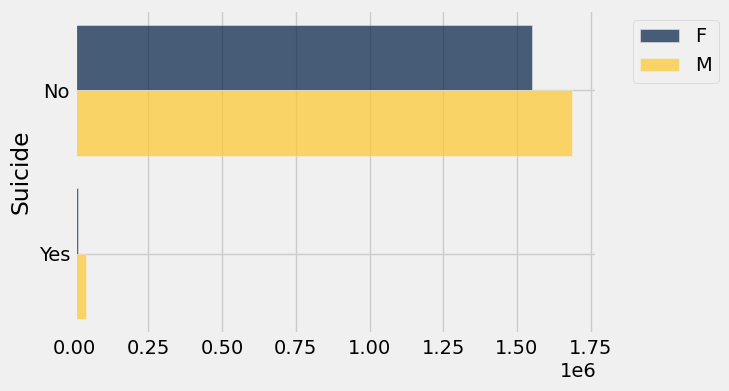

In [108]:
table2 = mort22.pivot("Sex", "Suicide")

table2.barh("Suicide")

In [109]:
table2.show()

Suicide,F,M
No,1553005,1686831
Yes,10263,39469


Two Proportions Z-test

How is it done?  First, find $\displaystyle \hat{p}_1 = \frac{\mathrm{x_1}}{\mathrm{n_1}}$.

Then find $\displaystyle z = \frac{\hat{p}_1 - \hat{p}_2}{\sqrt{\frac{\hat{p}_1(1-\hat{p}_1)}{n_1}  + \frac{\hat{p}_2(1-\hat{p}_2)}{n_2}}}$.

This is the UNpooled standard error, $\displaystyle \sqrt{\frac{\hat{p}_1(1-\hat{p}_1)}{n_1}  + \frac{\hat{p}_2(1-\hat{p}_2)}{n_2}}$, which I prefer.


The pooled standard error is found by first letting $\displaystyle \hat{p} = \frac{x_1+x_2}{n_1+n_2}$ then $\displaystyle \sqrt{\hat{p}(1-\hat{p}) \left( \frac{1}{n_1} + \frac{1}{n_2}\right)}$



This value of $z$ is from the standard normal distribution, $N(0, 1)$, so find the p-value from that.

Is the proportion of male suicides greater than the proportion of female suicides.  



In [110]:
x1 = 10263
n1 = 1553005

x2 = 39469
n2 = 1686831

p1 = x1/n1
p2 = x2/n2

z_unpooled = (p2 - p1)/(p1*(1-p1)/n1 + p2*(1-p2)/n2)**0.5

p_value_un = 1-scipy.stats.norm.cdf(z_unpooled)

pooled = (x1+x2)/(n1+n2)

z_pooled = (p2-p1)/(pooled*(1-pooled)*(1/n1 +1/n2))**0.5
p_value_po = 1-scipy.stats.norm.cdf(z_unpooled)


(z_unpooled, p_value_un, z_pooled, p_value_po)

(125.93796401938832, 0.0, 122.80322328144432, 0.0)

The `statsmodels.stats.proportion.proportions_ztest` will do a 2-proportion z-test.  You just have to put the successes into an array and the trials into a separate array.  See:

In [111]:
suic = np.array([39469, 10263])

totals = np.array([ 1686831, 1553005])

Z_test(suic, totals)

(122.80322328144432, 0.0)

In [112]:
suic/totals

array([ 0.02339831,  0.00660848])

As you can see, this test uses the pooled standard error.  That' okay, I'm not mad about it, just as long as you know that's what it's doing.  If you ever realize that this test is not appropriate, you may have use the code from above to run the unpooled test on your own.  We'll use this pooled test.

**Reporting out:** With the proportion of male deaths that are suicides being 2% while the proportion of female deaths that are suicides is 0.7% and the $p$-value from the binomial test is essentially 0, so we conclude that the proportion of male deaths due to suicide is much higher.  

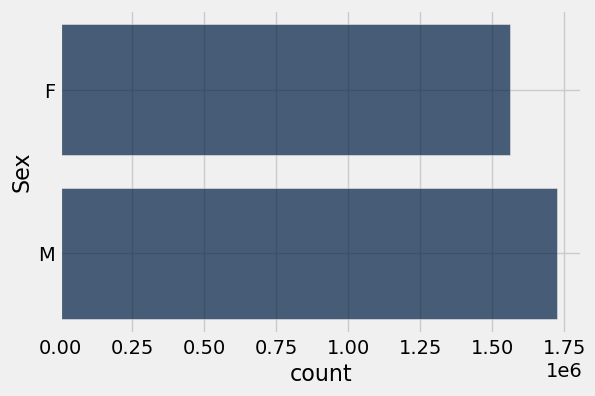

In [113]:
table1.barh("Sex")

In [114]:
table3 = mort22.group("Race")
table3

Race,count
AIAN,25490
API,100239
Black,420430
Other/Mixed,16015
White,2727394


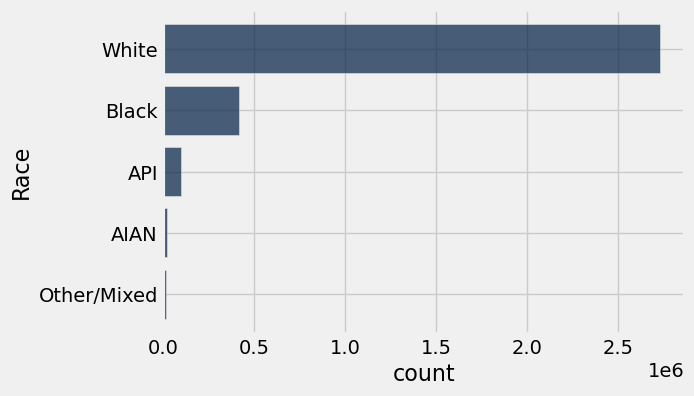

In [115]:
table3.sort("count", True).barh("Race")

In [116]:
table4 = mort22.pivot( "Suicide", "Race")

table4

Race,No,Yes
AIAN,24786,704
API,98413,1826
Black,416444,3986
Other/Mixed,15454,561
White,2684739,42655


Suicide is rare event, so in most groups the bar representing the number of suicides is not visible.  

See below. 

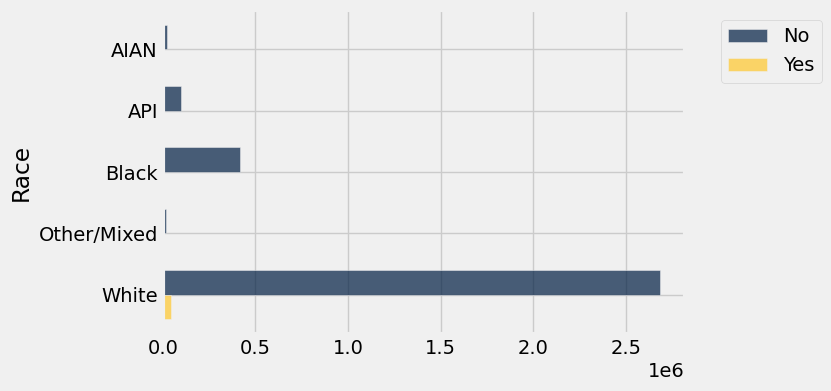

In [117]:
table4.barh("Race")

Obviously, there are **more** White suicides than Black suicides.  But, there are also more white people too.  The real question is this: is the *proportion* of suicides among the white people higher than the same among the black people?  Using the 2-proportion z-test and the data available to us, we can answer this question.  

In [118]:
np.array([42655, 3986])/np.array([42655+2684739, 3986+416444])

array([ 0.01563947,  0.00948077])

In [119]:
Z_test(np.array([42655, 3986]), np.array([42655+2684739, 3986+416444]))

(30.765752694639012, 7.5284012177971535e-208)

**Reporting:** The proportion of White deaths that are suicides is 1.6% while the proportion of Black deaths is 0.9%. With $p \approx 0$, we conclude that this difference in proportions is statistically significant.  

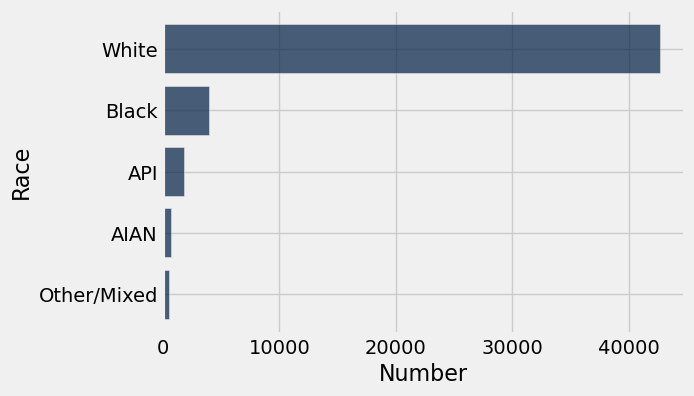

In [120]:
table4.drop("No").relabel("Yes", "Number").sort("Number", True).barh("Race")

In [121]:
suicide22 = mort22.where("Suicide", "Yes")

suicide22

Sex,Race,Month_of_Death,Heart,Suicide
M,White,1,No,Yes
M,Other/Mixed,1,No,Yes
F,AIAN,1,No,Yes
F,White,1,No,Yes
M,AIAN,1,No,Yes
M,White,1,No,Yes
M,White,1,No,Yes
M,AIAN,1,No,Yes
M,White,1,No,Yes
M,White,2,No,Yes


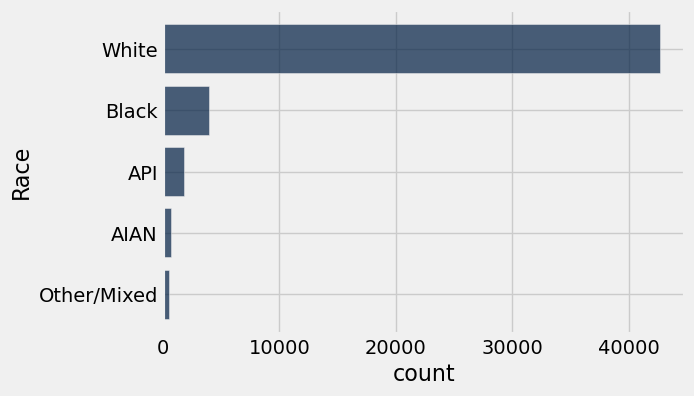

In [122]:
suicide22.group("Race").sort("count", True).barh("Race")

In [123]:
table5 = mort22.pivot( "Suicide", "Month_of_Death")

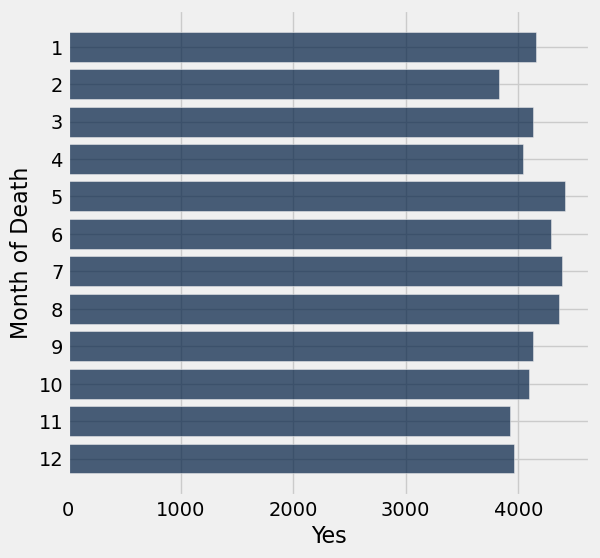

In [124]:
#table5.relabel("Yes", "Number").drop("No").relabel("Month_of_Death", "Month of Death").barh("Month of Death")

table5.drop("No").relabel("Month_of_Death", "Month of Death").barh("Month of Death")

In [125]:
table5.show()

Month_of_Death,No,Yes
1,366222,4160
2,287220,3830
3,264809,4128
4,242727,4040
5,250707,4418
6,244719,4292
7,256628,4387
8,255428,4363
9,247520,4129
10,261622,4096


Are people more likely to commit suicide in December?

First, we could assume that suicides are evenly distributed throughout the year, that is that $\frac{1}{12}^{th}$ of those that will occur during the year will occur in each month.  

If we do that, then we can easily run 1-proportion z-test.  


In [126]:
total = np.sum(table5.column("Yes") )

december = table5.where("Month_of_Death", 12).column("Yes").item(0)

Z_test(december, total, 1/12, alternative = "larger")


(-2.9519069037022492, 0.99842090933674599)

Are people more likely to commit suicide in December than in November?  

To answer this question, let's consider the proportion of deaths in each month that are due to suicide.  

In [127]:
suic = np.array([3923, 3966])

total = suic + np.array([264902, 297332])

display(suic/total)

Z_test(suic, total, alternative = "larger")

array([ 0.01459314,  0.01316305])

(4.6143522397907342, 1.9716159374202999e-06)

*BE CAREFUL*.  We asked a question with a particular direction and we got a small $p$-value, so at first you're tempted to conclude that the suicide rate is higher in December.  But it's 1.4% in November and goes down to 1.3% in December.  What happened?  I listed November's numbers first because it's earlier in the year!  Either, I put the data into the arrays in the wrong order or I need to change my alternative.

In [128]:
Z_test(suic, total, alternative = "smaller")

(4.6143522397907342, 0.9999980283840626)

Again, the results may be confusing, a large $p$-value usually means that there's no difference.  But remember, no 1-tailed p-value is ever really greater than 1.  The result here is this: not only is my prejudice that the suicide rate goes up in December WRONG but actually November has a statistically higher suicide rate.  

Given that there are 12 months, we should probably be running a $\chi^2$ Goodness-of-Fitness test.

We already covered this test.  This would be a good review, and it also points out something that is a fact about statistical analysis--that you don't just run one type of test at a time when working with real data.  

In [147]:
1/12

0.08333333333333333

In [150]:
null_proportions = np.repeat(1/12, 12)

yeses = table5.column("Yes")

total = sum(yeses)

proportions = yeses/total
display(np.round(proportions, 3))

scipy.stats.chisquare(yeses, null_proportions*total )


array([ 0.084,  0.077,  0.083,  0.081,  0.089,  0.086,  0.088,  0.088,
        0.083,  0.082,  0.079,  0.08 ])

Power_divergenceResult(statistic=95.785409796509299, pvalue=1.2152977854867073e-15)

So, 8% of the suicides in the year occured in February, this is the lowest percent and it nearly ties with December.  Meanwhile, 8.9% of the suicides occur in May.  The assumption that 8.3% of the suicides occur in each month is most likely not true, and the $p$-value of the relevant hypothesis test is essentially 0.  



## Bigfoot!

In [151]:
bigfoot = Table.read_table("bfro_fixed.csv")

formap = bigfoot.select("lat", "lon")

#Circle.map_table(formap, area = 3)

col = np.repeat("orange", formap.num_rows)

season = bigfoot.column("season")

for i in np.arange(formap.num_rows):
    if season.item(i)== "Spring":
        col[i] = "green"
    elif season.item(i)== "Winter":
        col[i] = "blue"
    elif season.item(i)== "Summer":
        col[i] = "red"

#formap = formap.with_column("color", col)

#Circle.map_table(formap, area = 3)
region = np.repeat("Southeast", formap.num_rows)


state = bigfoot.column("state")

for i in np.arange(formap.num_rows):
    if state.item(i) in make_array("New York", "Pennsylvania", "New Jersey", "Maine", "Vermont", "New Hampshire", "Rhode Island"
                                   , "Connecticut", "Massachusetts", "Delaware", "Maryland"):
        region[i] = "Northeast"
    elif state.item(i) in make_array("California", "Alaska", "Washington", "Oregon", "Montana", "Idaho",
                                    "Nevada", "Utah", "Arizona", "New Mexico", "Colorado", "Wyoming",):
        region[i] = "West"
    elif state.item(i) in make_array("Oklahoma", "Kansas", "Missouri", "Iowa", "Nebraska", "South Dakota", "North Dakota",
                                    "Minnesota", "Wisconsin", "Illinois", "Indiana", "Ohio", "Michigan"):
        region[i] = "Midwest"

bigfoot = bigfoot.with_column("region", region)


bigfoot.pivot("region", "season").show()

bigfoot.group("region").show()

col = np.repeat("orange", formap.num_rows)

season = bigfoot.column("season")

for i in np.arange(formap.num_rows):
    if season.item(i)== "Spring":
        col[i] = "green"
    elif season.item(i)== "Winter":
        col[i] = "blue"
    elif season.item(i)== "Summer":
        col[i] = "red"

formap = formap.with_column("color", col)

Circle.map_table(formap, area = 3)

Table.to_csv(bigfoot, "bf_region_season.csv")

season,Midwest,Northeast,Southeast,West
Fall,362,70,376,399
Spring,197,39,212,220
Summer,407,76,418,586
Unknown,17,1,29,17
Winter,164,35,249,171


region,count
Midwest,1147
Northeast,221
Southeast,1284
West,1393


Is the proportion of Summer bigfoot sightings in the West different from the proportion of summer bigfoot sightings in the Southeast.  

In [130]:
summer_west = 586
west = 1393

summer_south = 418
south = 1284

summer = np.array([summer_west, summer_south])
totals = np.array([west, south])

Z_test(summer, totals)

(5.0790588163592725, 3.7930927769689418e-07)

In [131]:
summer/ totals

array([ 0.4206748 ,  0.32554517])

**Reporting out:** In the West, 42% of Bigfoot sightings take place in the summer but in the Southeast only 33% of sightings occur in the summer.  This difference in proportions is statistically significant ($Z = 5.079$, $p = 0.000$).